# Geocoding and plotting from addresses
Date : 16th March 2023  
Author : Sanjay Somanath  
Instruction : Click on Runtime above, and then runall (Ctrl + F9)


I couldnt find my original script but this code was generated by ChatGPT using the following prompt :

```
Write a python script that takes as input a csv with a single column called "address" and returns a csv with four columns, address, "lat", "lon" and "confidence".
Create a auth_key variable where I can add my api key.
Specify the region in the geocode.xyz api as Sweden "SE".
Do you require any additional information or instructions?
```

I found that you can simply copy paste the block of code into chatGPT and ask it to make the changes you would like.


There were a few additional prompts for the plotting and saving the files.

Also remember, I am using my own authorisation key. If you would like to run this for a large dataset, PLEASE REPLACE THIS WITH YOUR OWN KEY!!

# Script explaination

## Importing required packages

In [ ]:
# Import required packages
import requests
import csv

This code imports the necessary packages for the script to function correctly.

-   `requests` is a package used for making HTTP requests in Python.
-   `csv` is a built-in package for handling CSV files.

## Setting input file path and data

Here, I am creating some dummy data so you can open it up to see what your data should look like. Ideally, you will replace this input.csv file with your own.

In [ ]:
# Set input file path and data
input_file = "input.csv"
data = ["Rimfrostgatan 31, Göteborg", "Sven hultins gata 6, Göteborg"]

This code sets the input file path and data.

-   `input_file` is a string variable that stores the path of the input CSV file.
-   `data` is a list variable that contains the addresses that will be written to the CSV file.

## Writing Data to Input CSV File

In [ ]:
# Write data to input CSV file
with open(input_file, "w", newline="") as file:
    writer = csv.writer(file)
    writer.writerow(["address"])  # Write header row
    for row in data:
        writer.writerow([row])


This code writes the data to the input CSV file.

-   `with open(input_file, "w", newline="") as file:` opens the input CSV file in write mode and creates a file object called `file`.
-   `csv.writer(file)` creates a `csv.writer` object that allows us to write to the CSV file.
-   `writer.writerow(["address"])` writes the header row to the CSV file.
-   `for row in data: writer.writerow([row])` writes each address from the `data` list to the CSV file.

### Code Summary
This block of code first imports the requests and csv packages. Then, it sets the path of the input CSV file and the data to be written to it.

Next, it uses a with statement to open the CSV file in write mode and create a csv.writer object. It then writes the header row to the file and loops through the data, writing each row to the file.

# Fetching the data

## Set API key and region
IMPORTANT!! : This is my personal key, please get your own key from geocode.xyz if you would like to run a large number of points!

In [ ]:
# Set API key and region
auth_key = "API Key"
region = "SE"

In this section, the user sets the API key and region they are interested in. This will be used later in the code to make API requests for geocoding purposes.

## Set input and output file paths


In [ ]:
# Set input and output file paths
input_file = "input.csv"
output_file = "output.csv"

Here, the user sets the input and output file paths. These file paths are used later in the code to open input and output CSV files.

## Open input and output files

This section opens the input and output files. The "with" statement is used to ensure that the files are properly closed after use, even if an error occurs. The "open" function is used to open the files in read and write mode, respectively.

In [ ]:
# Open input and output files
with open(input_file, "r") as input_csv, open(output_file, "w", newline="") as output_csv:
    # Create CSV reader and writer objects
    reader = csv.DictReader(input_csv)
    writer = csv.DictWriter(output_csv, fieldnames=["address", "lat", "lon", "confidence"])
    writer.writeheader()  # Write header row to output file

    # Loop through each row in the input CSV file
    for row in reader:
        # Build URL for geocoding API request
        url = f"https://geocode.xyz/{row['address']}?auth={auth_key}&region={region}&json=1"

        # Send API request and parse response JSON
        response = requests.get(url)
        data = response.json()

        # Extract latitude, longitude, and confidence from response data
        lat = data["latt"]
        lon = data["longt"]
        confidence = data["standard"]["confidence"]

        # Write row to output CSV file
        writer.writerow({"address": row["address"], "lat": lat, "lon": lon, "confidence": confidence})


### Code summary
This block of code sets the API key and region for the geocoding API, and the input and output file paths. It then opens the input and output files using a with statement and creates csv.DictReader and csv.DictWriter objects for them. It also writes the header row to the output file.

The code then loops through each row in the input CSV file, builds a URL for the geocoding API request using the address in the current row, sends the request using the requests.get() function, and parses the response JSON using the response.json() method.

The latitude, longitude, and confidence values are then extracted from the response JSON and written to the output CSV file using the csv.DictWriter.writerow() method.

Overall, this code takes a list of addresses, geocodes them using the geocode.xyz API, and saves the resulting latitude, longitude, and confidence values to an output CSV file.

# Plotting the data
## Installing packages that are not available in Google Colab

This is installing three Python packages, `mapclassify`, `geopandas`, and `contextily`, using the package installer for Python called `pip`.

`pip` is a tool that is used to install, upgrade, and manage Python packages. Python packages are collections of code that extend the functionality of Python, making it possible to perform various tasks without having to write code from scratch.

The `!` symbol at the beginning of each command is called a "bang" and is used to indicate to the Jupyter notebook that the following command is a shell command rather than Python code. In other words, it tells the notebook to execute the command as if it were typed in a terminal, rather than as Python code.

In [ ]:
!pip install mapclassify
!pip install geopandas
!pip install contextily

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Plotting the data

The following code snippet uses geopandas, pandas, matplotlib, and contextily packages to plot a map and save the geodataframe into different file formats.

## Importing packages

In [ ]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import contextily as ctx

## Plotting the geodataframe on a map

In [ ]:
# Set output file paths
output_file = "output.csv"
plot_file = "output_map.png"
shapefile = "output_shapefile.shp"
geojson = "output_geojson.json"

# Read output CSV file into a pandas dataframe
df = pd.read_csv(output_file)

This code sets output file paths for four files: `output.csv`, `output_map.png`, `output_shapefile.shp`, and `output_geojson.json`. It then reads the `output.csv` file into a pandas dataframe called `df` using the `read_csv()` function.

In [ ]:
# Convert the pandas dataframe to a geopandas dataframe
gdf = gpd.GeoDataFrame(
    df, geometry=gpd.points_from_xy(df["lon"], df["lat"]), crs="EPSG:4326"
)

## Exploring the data

In [ ]:
# Read contents of GDF
gdf

,address,lat,lon,confidence,geometry
0,"Rimfrostgatan 31, Göteborg",57.73117,11.89184,1.0,POINT (11.89184 57.73117)
1,"Sven hultins gata 6, Göteborg",57.68733,11.97645,1.0,POINT (11.97645 57.68733)


In [ ]:
# Explore GDF on map. The following code should be enough.
#gdf.explore()

# Or, if you want to get fancy with the map
import folium
m=None
gdf.explore(m=m, marker_type='marker', marker_kwds={'icon': folium.map.Icon(icon='home', prefix='fa')})

## Plotting the data

The next step is to convert the `df` dataframe to a geopandas dataframe called `gdf`. The `gpd.GeoDataFrame()` function is used to do this, with the `points_from_xy()` function used to generate a `geometry` column with `Point` objects based on the `lon` and `lat` columns in `df`. The CRS (coordinate reference system) for `gdf` is set to "EPSG:4326".

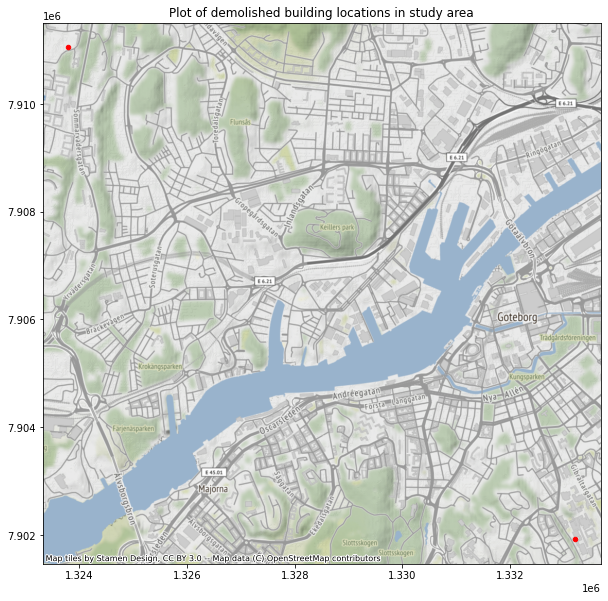

In [ ]:
# Set the figure size to a 1:1 aspect ratio
fig, ax = plt.subplots(figsize=(10, 10))

# Plot the geodataframe using gdf.plot() and add a basemap
gdf = gdf.to_crs("epsg:3857")
gdf.plot(ax=ax, markersize=20, color='red')
ax.set_title("Plot of demolished building locations in study area")
ctx.add_basemap(ax, crs=gdf.crs)

A figure with a 1:1 aspect ratio is then created with `plt.subplots()`, and the `gdf` geodataframe is plotted on it using `gdf.plot()`. The `markersize` parameter sets the size of the points, and the `color` parameter sets their color. The title of the plot is set using `ax.set_title()`. Finally, the `ctx.add_basemap()` function is used to add a basemap to the plot based on the CRS of `gdf`.

Overall, this code reads a CSV file with latitude and longitude data, converts it to a geodataframe, plots it on a map, and adds a basemap to provide geographical context.

## Saving the plot as an image

In [ ]:
# Save plot to an image file
fig.savefig(plot_file)

The savefig() function saves the plot as a PNG image with a filename specified in the plot_file variable.

## Saving the geodataframe to different file formats

In [ ]:
# Save geodataframe to a shapefile and GeoJSON file
gdf.to_file(shapefile, driver="ESRI Shapefile")
gdf.to_file(geojson, driver="GeoJSON")

This piece of code saves the `gdf` geopandas dataframe into two different files: a shapefile and a GeoJSON file. The output file paths for each file were previously set as `shapefile` and `geojson`, respectively.

To save the geopandas dataframe as a shapefile, the method `to_file` is used with the `driver` parameter set to `"ESRI Shapefile"`. This method saves the dataframe into the specified file path in shapefile format.

To save the geopandas dataframe as a GeoJSON file, the same `to_file` method is used, but with the `driver` parameter set to `"GeoJSON"`. This method saves the dataframe into the specified file path in GeoJSON format.